In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('source.csv')

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df.set_index('species', inplace=True)

In [6]:
df

,cannelloni,basil,pastry,filling,leafy,quesadillas,goulash,tomatilla,vegetables,peaches,...,crawfish,beet,tomatillo,cactus,meringue,ranch,octopus,lettuce,peas,mango
species,,,,,,,,,,,,,,,,,,,,,
faecalis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
enterica,1,2,1,1,0,1,0,1,6,0,...,2,0,0,0,2,1,0,18,1,7
vibrio,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
giardia,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
shellfish,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
perfringens,0,0,0,0,0,0,2,0,2,0,...,1,2,0,0,0,0,0,5,2,0
clostridium,0,0,0,0,0,0,2,0,2,0,...,1,4,0,0,0,0,0,5,3,0
enteropathogenic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_diseases_reduced = df.sum()

In [8]:
df_foods_reduced = df.sum(axis=1)

In [9]:
# top 10 outbreak sources as a percent of total sources; note that these categories are not mutually
# exclusive (outbreaks can have more than one contaminated product, and string processing was
# imperfect), so percentages do not add up to 100

In [10]:
top_foods = df_diseases_reduced.sort_values(ascending=False) / df_diseases_reduced.sum() * 100

In [11]:
top_foods

chicken     9.558717
salad       6.912176
beef        3.977027
ice         2.828364
sandwich    2.444515
              ...   
fudge       0.000000
taro        0.000000
cockles     0.000000
glacial     0.000000
pretzel     0.000000
Length: 859, dtype: float64

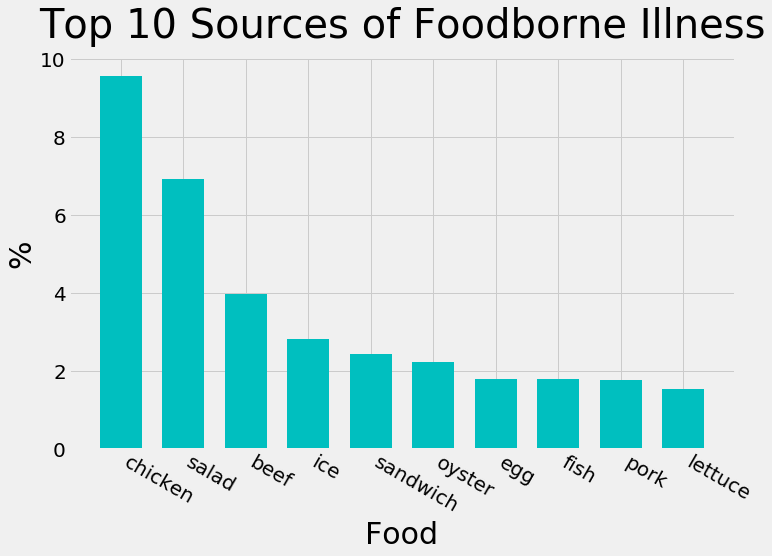

In [22]:
top = top_foods
n = 10
x = top[:n].index
y = top[:n]
y_pos = np.linspace(1,2,num=10)
strings = ['Food', '%', 'Top 10 Sources of Foodborne Illness']

bar_width = 0.075
fig_size = (12,8)
font1 = 20
font2 = 30
font3 = 40
colour = 'c'

fig,ax = plt.subplots(figsize=fig_size)

ax.bar(y_pos, y, width=bar_width, color=colour)
ax.set_xlabel(strings[0], fontsize=font2)
ax.set_ylabel(strings[1], fontsize=font2)
ax.set_title(strings[2], fontsize=font3, pad=20)

plt.xticks(y_pos, x, fontsize=font1, rotation=-30, ha='left')
plt.yticks(fontsize=font1)

plt.style.use('fivethirtyeight')
plt.subplots_adjust(bottom=0.2, left=0.13, right=0.9) 

plt.savefig('figures/sources');

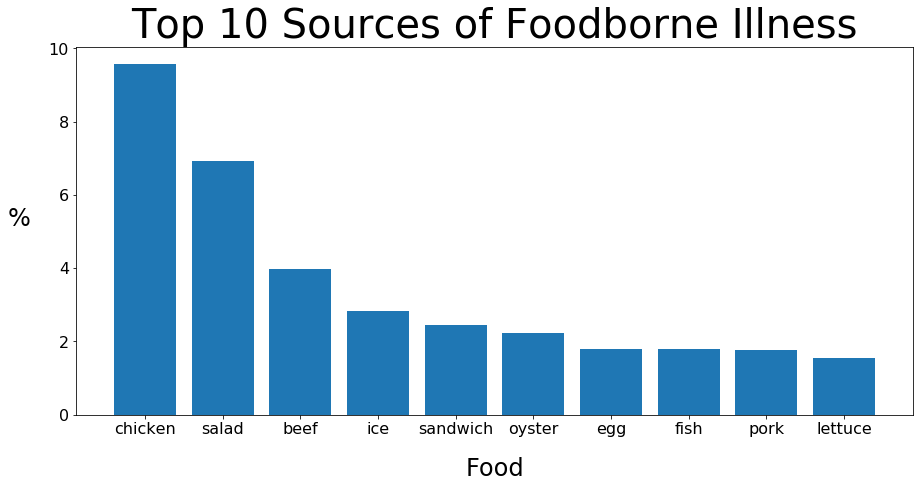

In [13]:
# fig,ax = plt.subplots(figsize=(15,7))
# ax.bar(top_foods[:10].index,top_foods[:10])
# ax.set_xlabel('Food', labelpad = 20, fontsize=24)
# ax.set_ylabel('%', fontsize=24, labelpad = 30, rotation=0)
# ax.set_title('Top 10 Sources of Foodborne Illness', fontsize=40)
# plt.style.use('fivethirtyeight')
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# plt.tight_layout
# plt.gcf().subplots_adjust(bottom=0.15)
# plt.savefig('figures/sources');

In [223]:
# top 10 outbreak etiologies as a percent of total etiologies; note that doubles in the chart,
# which is due to genus and species being separated into separate categories during string
# processing

In [224]:
top_diseases = df_foods_reduced.sort_values(ascending=False) / df_foods_reduced.sum() * 100

In [225]:
top_diseases

species
virus          15.830183
norovirus      15.512713
salmonella     10.043580
enterica        9.916592
clostridium     5.809691
                 ...    
vulnificus      0.005772
glutamate       0.005772
monosodium      0.005772
amnesic         0.002886
anisakis        0.002886
Length: 67, dtype: float64

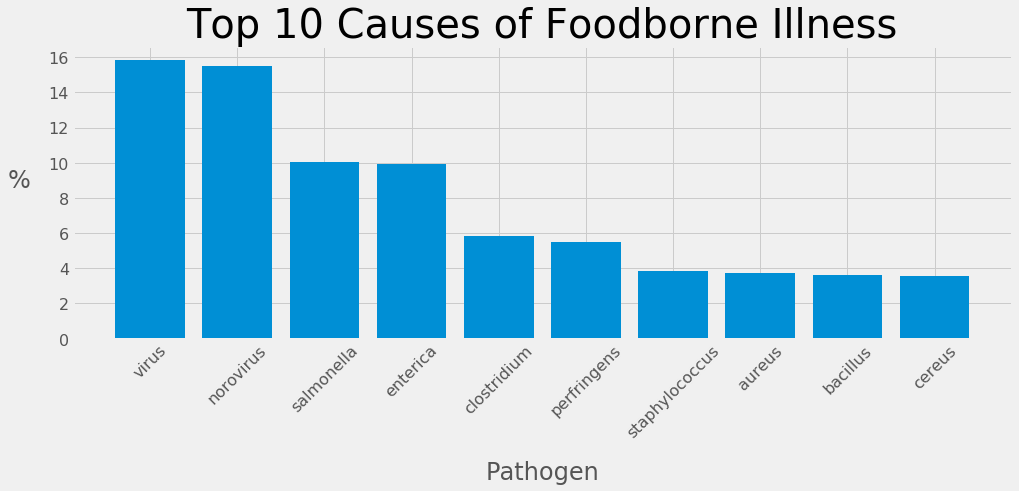

In [245]:
fig,ax = plt.subplots(figsize=(15,7))
ax.bar(top_diseases[:10].index,top_diseases[:10])
ax.set_xlabel('Pathogen', labelpad = 20, fontsize=24)
ax.set_ylabel('%', fontsize=24, labelpad = 30, rotation=0)
ax.set_title('Top 10 Causes of Foodborne Illness', fontsize=40)
plt.style.use('fivethirtyeight')
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.tight_layout
plt.gcf().subplots_adjust(bottom=0.30)
plt.savefig('figures/causes1');

In [227]:
# Again, note the data appears to be paired off

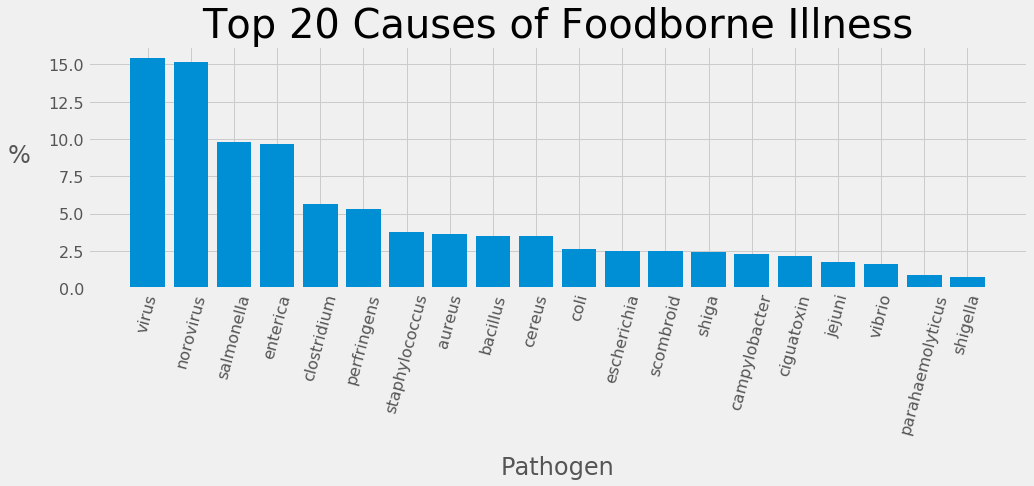

In [244]:
fig,ax = plt.subplots(figsize=(15,7))
ax.bar(top_diseases[:20].index,ten_diseases[:20])
ax.set_xlabel('Pathogen', labelpad = 20, fontsize=24)
ax.set_ylabel('%', fontsize=24, labelpad = 30, rotation=0)
ax.set_title('Top 20 Causes of Foodborne Illness', fontsize=40)
plt.style.use('fivethirtyeight')
plt.xticks(fontsize=16, rotation=75)
plt.yticks(fontsize=16)
plt.tight_layout
plt.gcf().subplots_adjust(bottom=0.40)
plt.savefig('figures/causes2');

In [229]:
# There is not a simple pattern to the duplicates, so I have manually selected some target organisms
# for further analysis

In [230]:
target_organisms = ['norovirus', 'salmonella', 'clostridium', 'staphylococcus', 'bacillus', 'escherichia', 'scombroid',
                    'shiga', 'campylobacter', 'ciguatoxin', 'jejuni', 'vibrio', 'shigella', 'listeria',
                    'botulinum', 'hepatitis', 'shellfish', 'cyclospora', 'cryptosporidium']

In [231]:
df1 = df.loc[target_organisms,:]

In [232]:
df1_foods_reduced = df1.sum(axis=1)

In [233]:
df1_foods_reduced

species
norovirus          5375
salmonella         3480
clostridium        2013
staphylococcus     1339
bacillus           1249
escherichia         882
scombroid           857
shiga               811
campylobacter       760
ciguatoxin          622
jejuni              568
vibrio              317
shigella            183
listeria            123
botulinum           116
hepatitis            71
shellfish            57
cyclospora           54
cryptosporidium      52
dtype: int64

In [234]:
top_diseases1 = df1_foods_reduced.sort_values(ascending=False) / df1_foods_reduced.sum() * 100

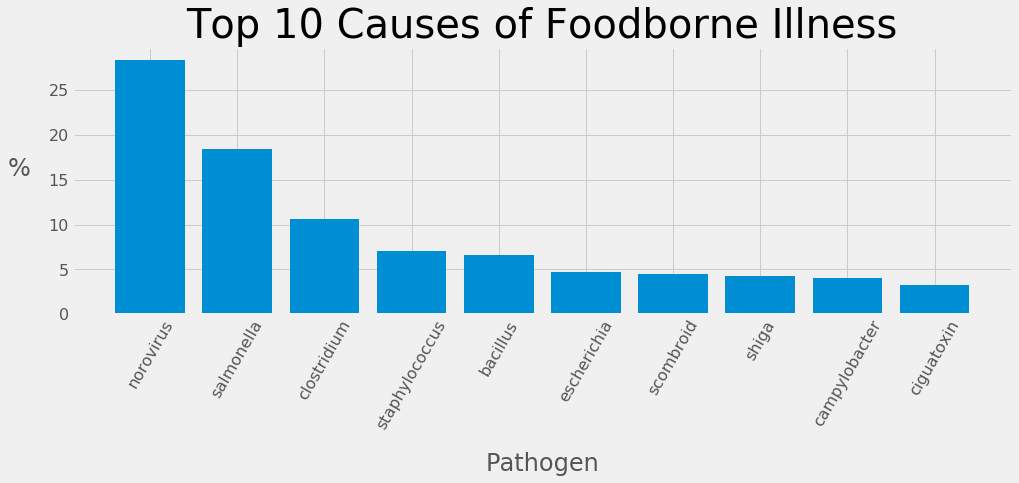

In [247]:
fig,ax = plt.subplots(figsize=(15,7))
ax.bar(top_diseases1[:10].index,top_diseases1[:10])
ax.set_xlabel('Pathogen', labelpad = 20, fontsize=24)
ax.set_ylabel('%', fontsize=24, labelpad = 30, rotation=0)
ax.set_title('Top 10 Causes of Foodborne Illness', fontsize=40)
plt.style.use('fivethirtyeight')
plt.xticks(fontsize=16, rotation=60)
plt.yticks(fontsize=16)
plt.tight_layout
plt.gcf().subplots_adjust(bottom=0.35)
plt.savefig('figures/causes3');